Iz dobro obveščenih virov na Facebooku se je izvedelo, kakšen je namen marsovske invazije: prišli so nam krast paradižnik! (Resno. To je povedal ugleden znanstvenik, ki je skoraj Nobelov nagrajenec za ekonomijo. Poglejte video.)


## Rešitev celotnega izpita

Najprej celotna rešitev, za predstavo o njegovem obsegu. Tule so preprosto razumljive, a ne nujno najkrajše različice .Posamične rešitve - in še kakšna alternativa - so potem razložene spodaj, skupaj z opisom nalog.

In [1]:
def uravnotezena(tovor):
    return abs(sum(tovor[::2]) - sum(tovor[1::2])) <= 10


def deli(paketi, kapacitete):
    ladje = [0] * len(kapacitete)
    for paket in paketi:
        naj_i = None
        for i, (ladja, kapaciteta) in enumerate(zip(ladje, kapacitete)):
            if ladja + paket <= kapaciteta and (
                    naj_i == None or ladja < ladje[naj_i]):
                naj_i = i
        if naj_i != None:
            ladje[naj_i] += paket
    return ladje


def kontrola(ime_datoteke):
    preobremenjene = set()
    for vrstica in open(ime_datoteke):
        ladja, kapaciteta, teze = vrstica.split(":")
        if sum(int(x) for x in teze.split(",")) > int(kapaciteta):
            preobremenjene.add(ladja)
    return preobremenjene


def pravilna(marsovec, hierarhija, antene):
    for podrejeni in hierarhija[marsovec]:
        if antene[podrejeni] > antene[marsovec] or not pravilna(podrejeni, hierarhija, antene):
            return False
    return True


class Ladja:
    def __init__(self):
        self.tovor = defaultdict(int)

    def nalozi(self, sorta, kolicina):
        if len(self.tovor) < 3 or sorta in self.tovor:
            self.tovor[sorta] += kolicina

    def kolicina(self, sorta):
        if sorta not in self.tovor:  # da ga defaultdict ne doda z 0
            return 0
        return self.tovor[sorta]

## 1. Uravnotežene ladje

Če je marsovska tovorna vesoljska ladja naložena tako, da je razlika med težo tovora na levi in desni strani večja od 10, se prevrne. Tudi v vesolju se zgodi. Zato jih natovarjajo tako, da pakete izmenično odlagajo na levo in na desno. Vendar si tega niso najboljše zamislili: če imajo pakete `[2, 10, 3, 8, 1]`, se ladja prevrne, ker je skupna teža paketov na levi enaka 6, na desni pa 18, kar je več kot 10 več.

Napiši funkcijo `uravnotezena(tovor)`, ki prejme seznam paketov in vrne `True`, če je ladja uravnotežena in `False`, če ni. Zaželeno je, da funkcijo napišeš v eni vrstici.

### Rešitev

Absolutna vrednost razlike vsote elementov na sodih in na lihih mestih mora biti manjša ali enaka 10.

In [2]:
def uravnotezena(tovor):
    return abs(sum(tovor[::2]) - sum(tovor[1::2])) <= 10

## 2. Delitev paketov
		
Kako bodo delili pakete po ladjah? Za vsako ladjo je znana nosilnost. Nato jemljejo pakete po vrsti. Vsak paket dajo na tisto ladjo, ki je trenutno najmanj obremenjena in je ta paket ne bo preobremenil. (Če je najmanj obremenjenih več ladij, gre paket na tisto, ki je prej na seznamu.) Če paketa ne more sprejeti nobena ladja, ga ne naložijo. Primer v tabeli kaže razporejanje paketov s težami `[6, 4, 2, 1, 5, 1, 15]` na ladje z nosilnostmi `[5, 20, 7]`.

```text
paket   kam gre in zakaj                 stanje
---------------------------------------------------
    6   na drugo, ker ne more na prvo    [0, 6, 0]
    4   prva ima najmanj                 [4, 6, 0]
    2   tretja ima najmanj               [4, 6, 2]
    1   tretja ima najmanj               [4, 6, 3]
    5   na prvo in tretjo ne more        [4, 11, 3]
    1   na tretji je najmanj             [4, 11, 4]
   15   ne gre nikamor                   [4, 11, 4]
---------------------------------------------------
```

Napiši funkcijo `deli(paketi, kapacitete)`, ki prejme teže paketov in seznam kapacitet razpoložljivih ladij. Vrniti mora seznam, ki vsebuje skupno težo paketov na vsaki ladji.

### Rešitev

Najprej pripravimo seznam, v katerem je toliko ničel, kolikor je ladij. To bo seznam, v katerega bomo shranjevali obremenjenost ladij in ki ga bomo na koncu tudi vrnili.

Nato gremo z zanko čez pakete. Za vsak paket poiščemo ladjo (torej: indeks ladje), na katero ga bomo naložili. Ladjo poiščemo tako, da gremo čez zazipana seznama ladij in kapacitet, vse skupaj pa še oštevilčimo, ker nas bodo zanimali indeksi. (Seveda bi se dalo to narediti tudi okorneje, recimo kar z `for i in range(len(ladje))`.) Za vsako ladjo preverimo, ali lahko sprejme ta paket (`ladja + paket <= kapaciteta`) in je to bodisi prva sprejemljiva ladja doslej (`naj_i == None`) bodisi je na njej manj kot na tisti ladji, na kateri je bilo doslej najmanj (`ladja < ladje[naj_i]`).

Če po tej zanki imamo ladjo, ki lahko sprejme ta paket, ga naložimo. Sicer pa nič.

In [3]:
def deli(paketi, kapacitete):
    ladje = [0] * len(kapacitete)
    for paket in paketi:
        naj_i = None
        for i, (ladja, kapaciteta) in enumerate(zip(ladje, kapacitete)):
            if ladja + paket <= kapaciteta and (
                    naj_i == None or ladja < ladje[naj_i]):
                naj_i = i
        if naj_i != None:
            ladje[naj_i] += paket
    return ladje

## 3. Kontrola načrta

Načrt natovarjanja je shranjen v datoteki. Vsaka vrstica vsebuje ime ladje, dvopičje, nosilnost, dvopičje in teže paketov, ki jih kanijo naložiti na to ladjo, na primer tako:

```text
Gubgat: 20: 10, 5, 6
Thrombaq: 5: 1
Thrombaq 2: 5: 1, 4
Humwat Bolwat: 10: 2, 2, 2, 2, 2, 2
Askeg 8: 13: 14
```

Napiši funkcijo `kontrola(ime)`, ki prejme ime datoteke in vrne množico imen ladij, ki so preobremenjene. V gornjem primeru so preobremenjene Gugbat, Humwat Bolwat in Askeg 8.

### Rešitev

Vsako vrstico datoteke razkosamo glede na `:`. Če je vsota tež, pretvorjenih v števila, večja od kapacitete (tudi pretvorjene v število), dodamo ladjo v množico preobremenjenih ladij.

In [4]:
def kontrola(ime_datoteke):
    preobremenjene = set()
    for vrstica in open(ime_datoteke):
        ladja, kapaciteta, teze = vrstica.split(":")
        if sum(int(x) for x in teze.split(",")) > int(kapaciteta):
            preobremenjene.add(ladja)
    return preobremenjene

## 4. Hierarhija

Marsovci imajo, vemo, na glavah antene. Te so pomembne za avtoriteto: marsovec s krajšo anteno ne more ukazovati marsovcu z daljšo.

Ladjo vodi hierarhija skladiščnikov; na sliki so njihova imena in dolžine njihovih anten v marsimetrih. Primer na sliki kaže nepravilno hierarhijo, saj Hans ne more ukazovati Eriku.

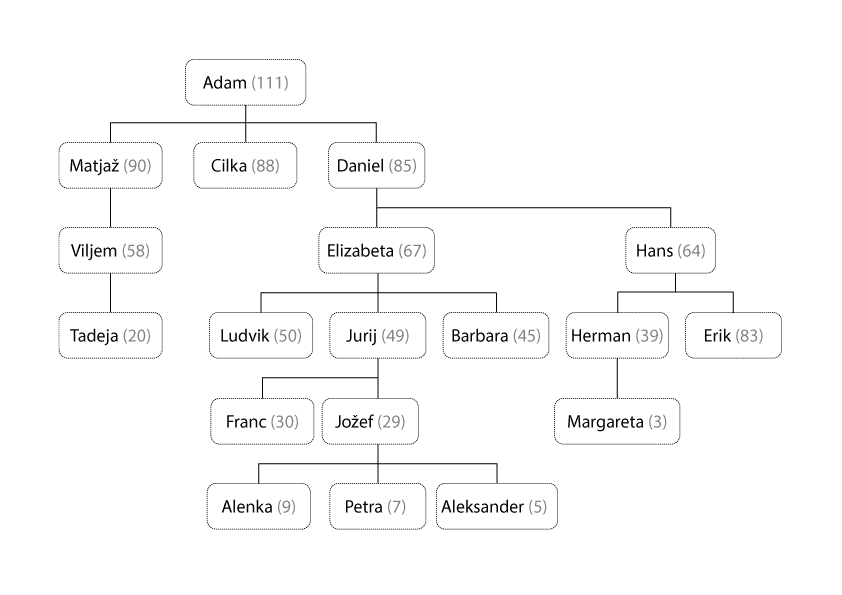

Napiši funkcijo `pravilna(marsovec, hierarhija, antene)`, ki prejme ime nekega marsovca, slovar s hierarhijo, slovar z dolžinami anten (glej primer v testih). Vrniti mora `True`, če je hierarhija pod podanim marsovcem pravilna in `False`, če ni.

### Rešitev

Preveriti je potrebno vse podrejene: če ima podrejeni daljšo anteno od podanega marsovca ali pa ni pravilna hierarhija pod podrejenim, vrnemo `False`. Če je s podrejenimi vse v redu, vrnemo `True`.

In [5]:
def pravilna(marsovec, hierarhija, antene):
    for podrejeni in hierarhija[marsovec]:
        if antene[podrejeni] > antene[marsovec] or not pravilna(podrejeni, hierarhija, antene):
            return False
    return True

Krajše je tako:

In [6]:
def pravilna(marsovec, hierarhija, antene):
    return all(antene[podrejeni] < antene[marsovec]
               and pravilna(podrejeni, hierarhija, antene)
               for podrejeni in hierarhija[marsovec])

## 5. Marsis

Marsovski Pravilnik o higieni živil pravi, da sme marsovska ladja tovoriti največ tri različne vrste paradižnika. Sprogramiraj razred Ladja z naslednjimi metodami.

- Konstruktor nima argumentov in naredi, kar je potrebno, da delujeta preostali metodi.
- `nalozi(sorta, teza)` preveri, ali ladja sme natovoriti (še) to sorto paradižnika. Če jo lahko, to pomeni, da ga bodo natovorili in funkcija vrne `True`. Če ga ne sme prevzeti, vrne `False`.
- `kolicina(sorta)` vrne skupno težo vseh natovorjenih paradižnikov te sorte (0, če je nimajo).

### Rešitev

Uporabili bomo `defaultdict`; pripravil ga bom konstruktor. `nalozi` bo dodajala vanj zelenjavo, vendar le, če bo imel slovar največ tri elemente.

In [7]:
class Ladja:
    def __init__(self):
        self.tovor = defaultdict(int)

    def nalozi(self, sorta, kolicina):
        if len(self.tovor) < 3 or sorta in self.tovor:
            self.tovor[sorta] += kolicina

    def kolicina(self, sorta):
        if sorta not in self.tovor:  # da ga defaultdict ne doda z 0
            return 0
        return self.tovor[sorta]

Grd trik je v `kolicina`: če bi napisali samo

```python
    def kolicina(self, sorta):
        return self.tovor[sorta]
```

bi to sicer vrnilo 0, vendar bi, ker imamo `defaultdict`, dodalo to zelenjavo v slovar.  Zato `if`.